## Logistic Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
## create the datset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=52)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [5]:
## model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [6]:
logistic.fit(X=X_train, y=y_train)

LogisticRegression()

In [7]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1]


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.8533333333333334
[[127  31]
 [ 13 129]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       158
           1       0.81      0.91      0.85       142

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



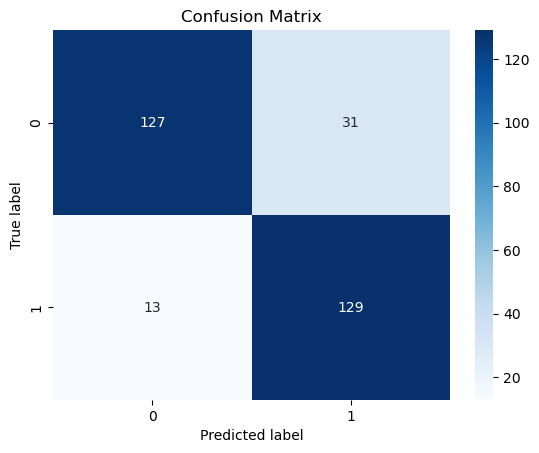

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
print(sum(y_pred))
print(sum(y_test))
print(sum(y_test) - sum(y_pred))

160
142
-18


## Hyperparameter Tuning and Cross Validation

## Grid SearchCV

In [12]:
model = LogisticRegression()
penalty = ['l2',]
c_values = [10, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [13]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [14]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [17]:
grid.best_estimator_, grid.best_params_

(LogisticRegression(C=10), {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'})

In [18]:
grid.best_score_

0.8699999999999999

In [19]:
y_pred = grid.predict(X_test)

In [20]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.8533333333333334
[[127  31]
 [ 13 129]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       158
           1       0.81      0.91      0.85       142

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



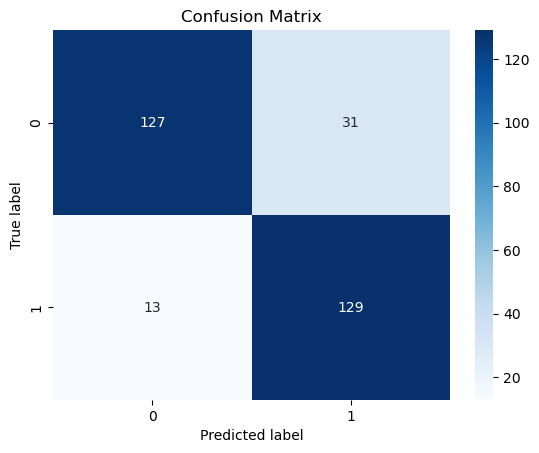

In [21]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Randomized SearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
model = LogisticRegression()
randomcv = randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy', n_jobs=-1)

In [24]:
randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [10, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [25]:
randomcv.best_score_

0.8699999999999999

In [26]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 10}

In [27]:
y_pred = randomcv.predict(X_test)

In [28]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.8533333333333334
[[127  31]
 [ 13 129]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       158
           1       0.81      0.91      0.85       142

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



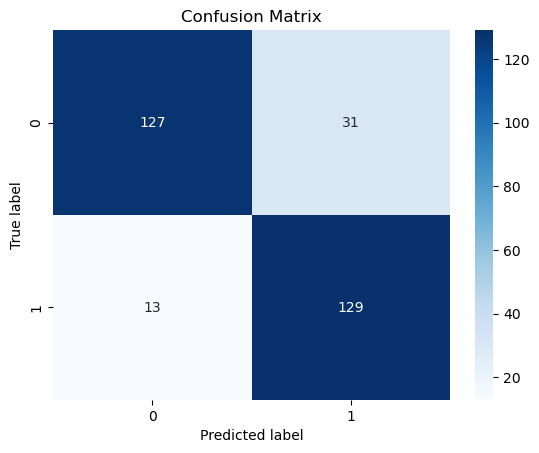

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression For Multiclass Classification Problem

In [30]:
## create the datset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=15)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [32]:
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [33]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.7833333333333333
[[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



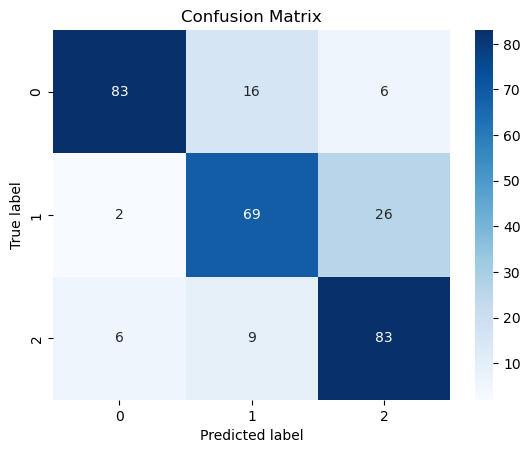

In [34]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression with Imbalanced Dataset

In [35]:
# Generate and plot a synthetic imbalanced Classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [36]:
## imbalanced dataset

X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [37]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [38]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

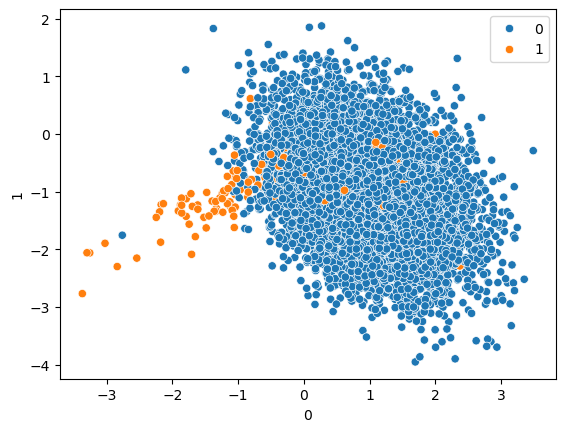

In [39]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
## Hyperparameter Tuning
model = LogisticRegression()
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [42]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()

grid= GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy')

In [44]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [45]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [46]:
grid.best_score_

0.9881333333333334

In [47]:
y_pred = grid.predict(X_test)

In [48]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression With ROC curve And ROC AUC Score

In [55]:
## roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [57]:
## Generate 2 Classs Dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [58]:
## Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
## created a dummy model with default 0 as output (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [61]:
## create a basic logistic model

model =  LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
## Prediction based on probablity
model_prob = model.predict_proba(X_test)

In [70]:
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [69]:
## Lets focus on positive outcome
model_prob = model_prob[:,1]

In [71]:
## lets's calculate the scores

dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)

print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [77]:
# Calculate ROC Curves 

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

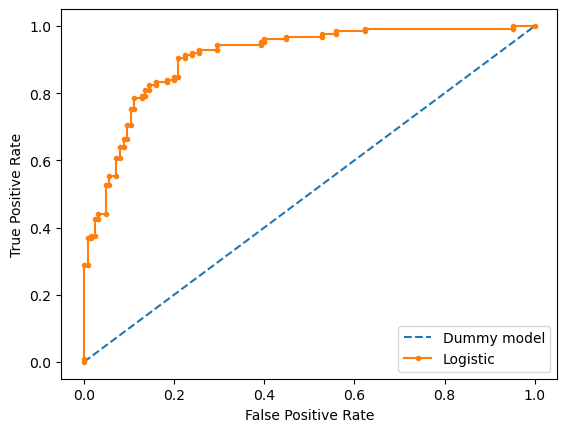

In [78]:
pyplot.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy model")
pyplot.plot(model_fpr, model_tpr, marker=".", label="Logistic")

pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")

pyplot.legend()

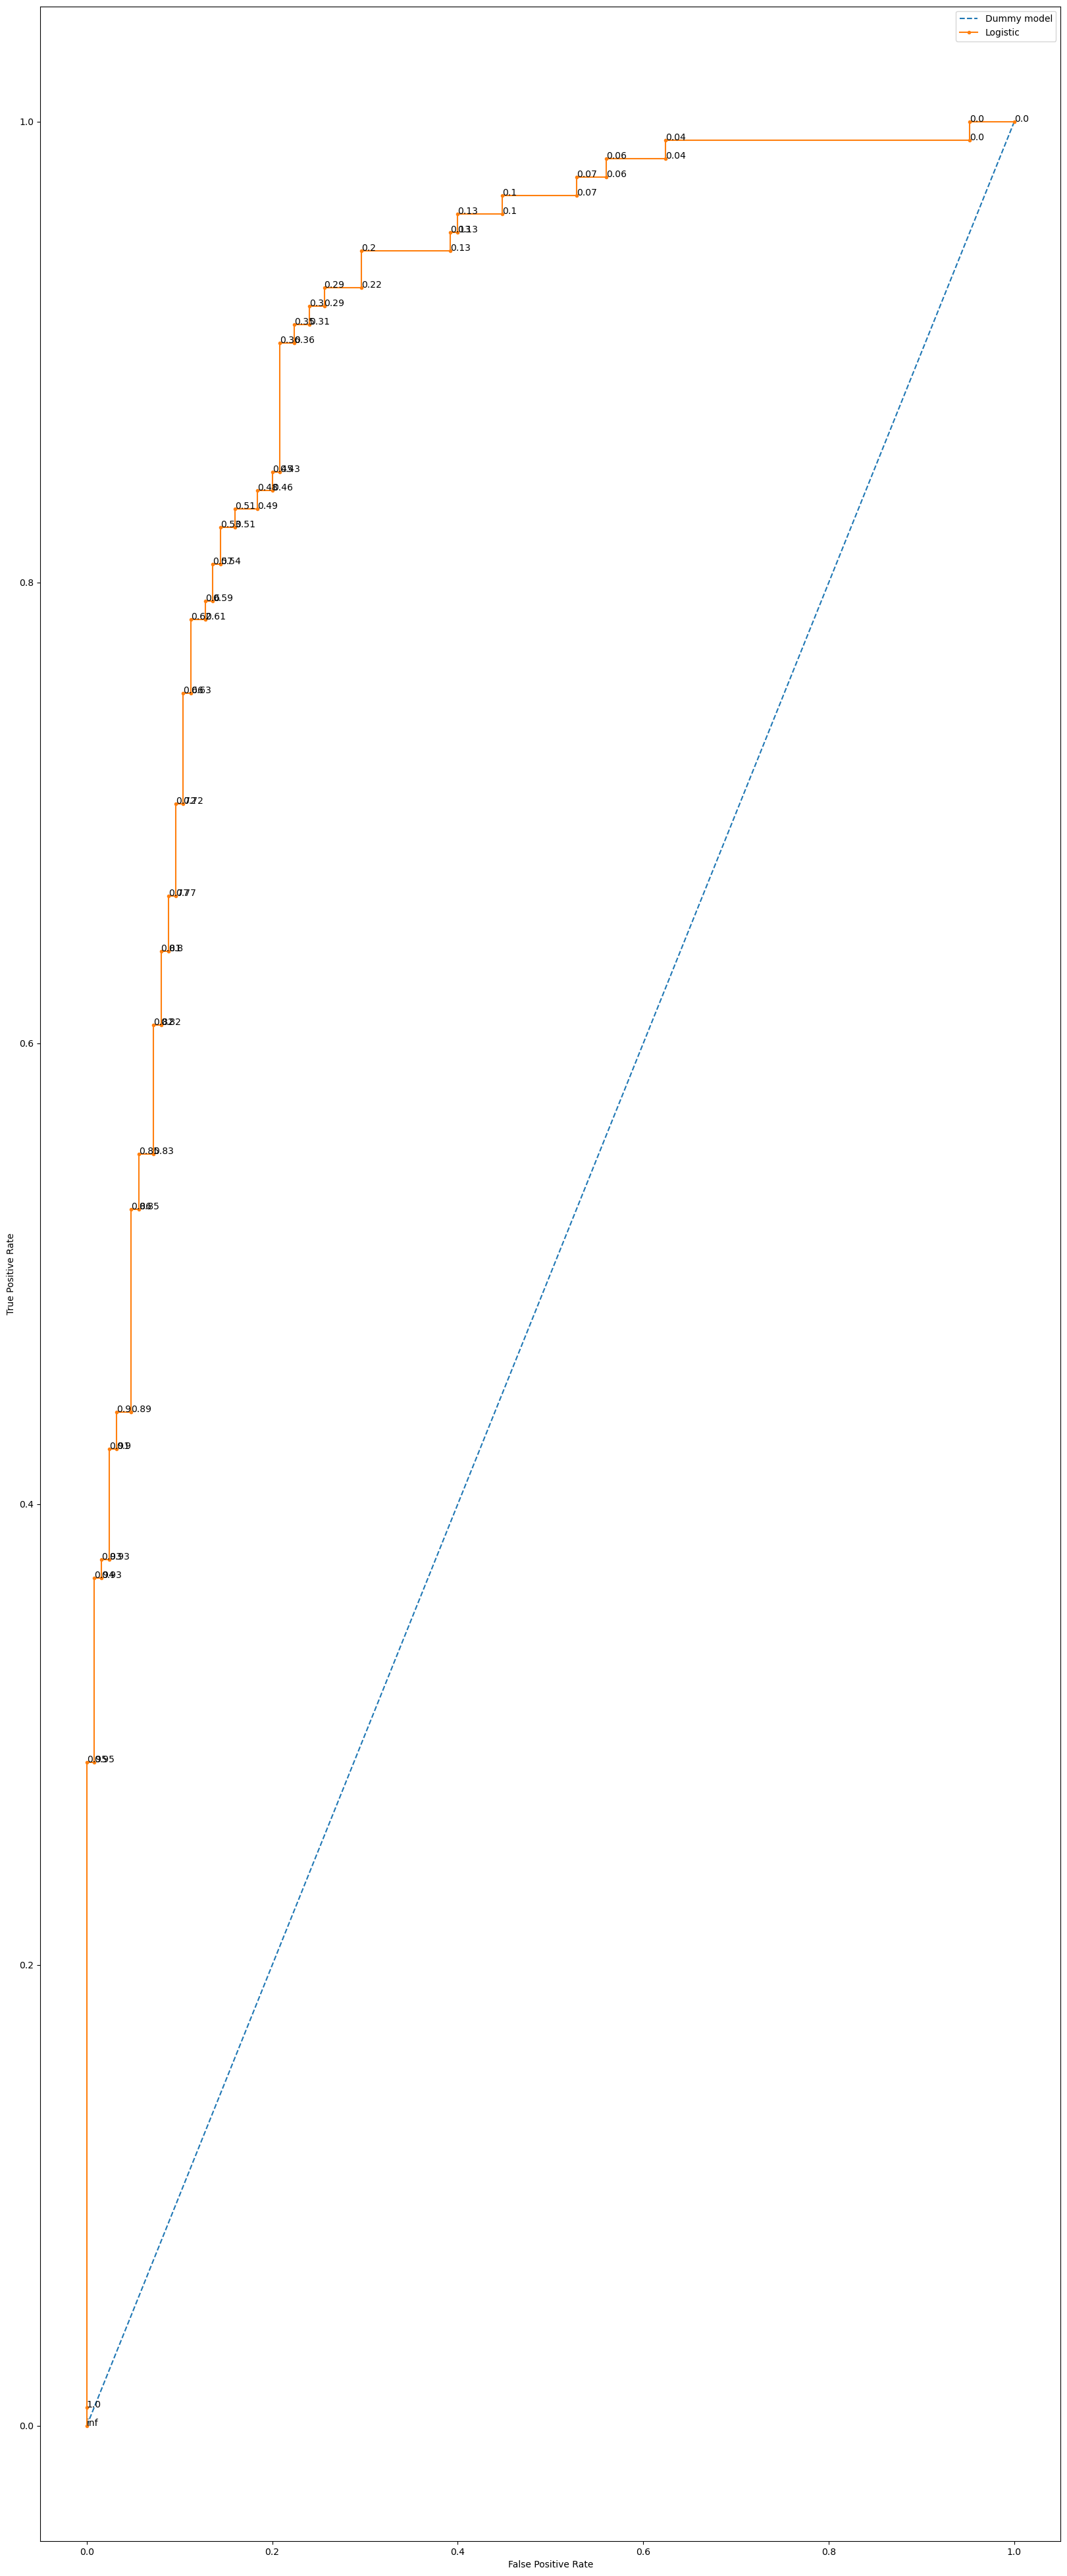

In [95]:
# Plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy model")
pyplot.plot(model_fpr, model_tpr, marker=".", label="Logistic")
ax = plt.subplot(111)

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy = (xyz[0], xyz[1]))
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()